In [1]:
import matplotlib.pyplot as plt
import numpy as np

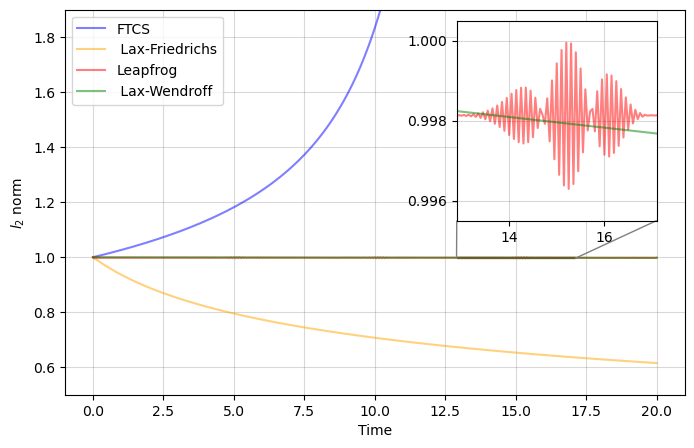

In [2]:
l2_FTCS = np.genfromtxt('./l2norm_FTCS_101points_0.5cf.txt', comments='#')
l2_LF = np.genfromtxt('./l2norm_LAXFRIED_101points_0.5cf.txt', comments='#')
l2_LW = np.genfromtxt('./l2norm_LAXWENDROFF_101points_0.5cf.txt', comments='#')
l2_LEAP = np.genfromtxt('./l2norm_LEAPFROG_101points_0.5cf.txt', comments='#')
time_FTCS = np.genfromtxt('./time_FTCS_101points_0.5cf.txt', comments='#')
time_LF = np.genfromtxt('./time_LAXFRIED_101points_0.5cf.txt', comments='#')
time_LW = np.genfromtxt('./time_LAXWENDROFF_101points_0.5cf.txt', comments='#')
time_LEAP = np.genfromtxt('./time_LEAPFROG_101points_0.5cf.txt', comments='#')

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(time_FTCS, l2_FTCS/l2_FTCS[0], alpha = 0.5, label = 'FTCS', c='b')
ax.plot(time_LF, l2_LF/l2_LF[0], alpha = 0.5, label = ' Lax-Friedrichs', c='orange')
ax.plot(time_LEAP, l2_LEAP/l2_LEAP[0], alpha = 0.5, label = 'Leapfrog', c='r')
ax.plot(time_LW, l2_LW/l2_LW[0], alpha = 0.5, label = ' Lax-Wendroff', c='g')

ax.legend(loc= 'upper left')
ax.set_ylim (0.5, 1.9)
ax.set_xlabel('Time')
ax.set_ylabel(r'$l_2$ norm')
ax.grid (c='gray', alpha = 0.3)

y1_zoom = 0.9955
y2_zoom = 1.0005
x1_zoom = 12.9
x2_zoom = 17.1

axins = inset_axes(ax, 2,2, bbox_to_anchor=(0.666,1-0.31,.3,.3), bbox_transform=ax.transAxes)
axins.plot(time_LEAP, l2_LEAP/l2_LEAP[0],alpha = 0.5,  label = 'Leapfrog', c='r')
axins.plot(time_LW, l2_LW/l2_LW[0], alpha = 0.5, label = ' Lax-Wendroff', c='g')
axins.grid(alpha = 0.3, color = 'gray')
axins.set_xlim(x1_zoom, x2_zoom)
axins.set_ylim(y1_zoom, y2_zoom)
plt.xticks(visible=True)
plt.yticks([0.996, 0.998, 1.000],visible=True)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
plt.draw()

plt.savefig('comparison_l2norm_v2.png', dpi=200)